# Load Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score


# Load and Explore the Dataset

In [12]:
# Load dataset
df = pd.read_csv("data.csv")

# Display first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# Check for null values
df.isnull().sum()



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [15]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


# Data Preprocessing

In [16]:
# Drop 'No' column if present
df.drop(columns=['No'], inplace=True, errors='ignore')

# Rename columns for readability
df.rename(columns={
    "X1 transaction date": "Transaction Date",
    "X2 house age": "House Age",
    "X3 distance to the nearest MRT station": "Distance to MRT",
    "X4 number of convenience stores": "Convenience Stores",
    "X5 latitude": "Latitude",
    "X6 longitude": "Longitude",
    "Y house price of unit area": "House Price"
}, inplace=True)

# Check dataset after renaming
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

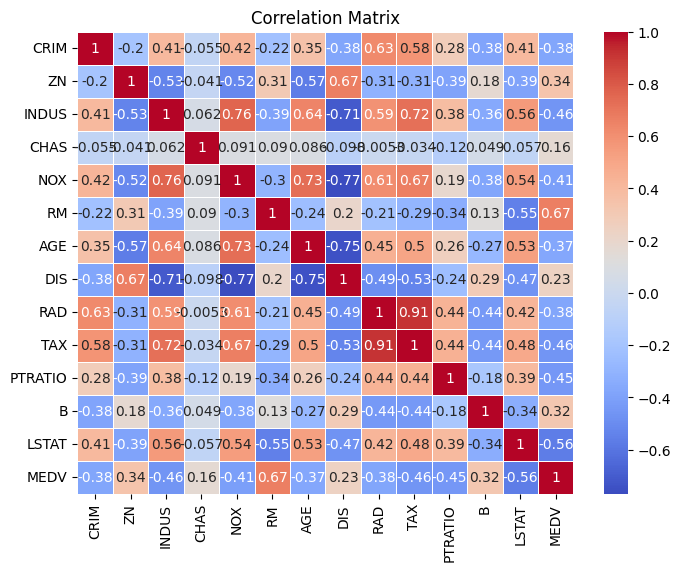

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


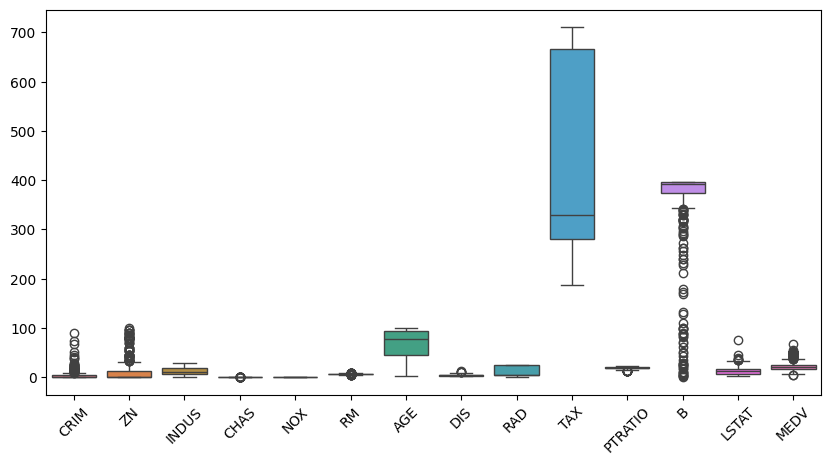

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()



# Feature Scaling

In [19]:
# Separate independent and dependent variables
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)


In [20]:
from sklearn.impute import SimpleImputer
# Handle missing values
imputer = SimpleImputer(strategy="mean")  # or "median"
X_filled = imputer.fit_transform(X)  # Returns NumPy array

# Convert back to DataFrame
X_filled = pd.DataFrame(X_filled, columns=X.columns)

# Double-check for NaNs
print("Missing values after imputation:", X_filled.isnull().sum().sum())  # Should print 0


Missing values after imputation: 0


# Apply Polynomial Transformation

In [21]:
# Apply polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X_filled)

print("Polynomial transformation successful! ")

# Convert back to DataFrame with feature names
feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names)


Polynomial transformation successful! 


# Split Data into Training and Testing Sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


# Apply Feature Selection Methods
We'll apply:

Backward Elimination<br>
Forward Selection<br>
Bidirectional Selection<br>
Keeping All Variables

## Backward Elimination

In [57]:
# Add intercept for statsmodels
X_train_be = sm.add_constant(X_train)

# Fit model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_be).fit()

# Print summary
print(model.summary())

# Select significant features (p-value < 0.05)
selected_features = model.pvalues[model.pvalues < 0.05].index
X_train_be_selected = X_train[selected_features.drop("const", errors="ignore")]  # Drop intercept if present
X_test_be_selected = X_test[selected_features.drop("const", errors="ignore")]

# Train final model
model_final = LinearRegression()
model_final.fit(X_train_be_selected, y_train)

# Predict
y_pred_be = model_final.predict(X_test_be_selected)

# Calculate R²
r2_be = r2_score(y_test, y_pred_be)
print("Backward Elimination R²:", r2_be)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     28.09
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          4.98e-110
Time:                        16:30:54   Log-Likelihood:                -1018.0
No. Observations:                 408   AIC:                             2244.
Df Residuals:                     304   BIC:                             2661.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.5045      9.245      1.785

## Forward Selection

In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Ensure no NaNs
X_train = X_train.dropna()
y_train = y_train.dropna()

# Linear regression model
lr_forward = LinearRegression()

# Forward selection
sfs_forward = SequentialFeatureSelector(lr, direction='forward', n_features_to_select=5)  # Set a fixed number
sfs_forward.fit(X_train, y_train)

# Get selected features
selected_forward = X_train.columns[sfs_forward.get_support()]
X_train_fs = X_train[selected_forward]
X_test_fs = X_test[selected_forward]

# Train model
lr_forward.fit(X_train_fs, y_train)

# Predict and evaluate
y_pred_fs = lr_forward.predict(X_test_fs)
r2_fs = r2_score(y_test, y_pred_fs)
print("Forward Selection R²:", r2_fs)


Forward Selection R²: 0.6511867386830449


## Bidirectional Selection

In [47]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear regression model
lr_bi = LinearRegression()

# Bidirectional selection using RFECV
rfecv = RFECV(estimator=lr, step=1, cv=5)  # 5-fold cross-validation
rfecv.fit(X_train, y_train)

# Get selected features
selected_bi = X_train.columns[rfecv.support_]
X_train_bi = X_train[selected_bi]
X_test_bi = X_test[selected_bi]

# Train model
lr_bi.fit(X_train_bi, y_train)

# Predict and evaluate
y_pred_bi = lr_bi.predict(X_test_bi)
r2_bi = r2_score(y_test, y_pred_bi)
print("Bidirectional Selection R²:", r2_bi)



Bidirectional Selection R²: 0.44790356394185904


## Keeping All Variables

In [41]:
# Train model using all polynomial features

lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
# Predict
y_pred_all = lr_all.predict(X_test)

# Evaluate
r2_all = r2_score(y_test, y_pred_all)
print("All Variables R²:", r2_all)


All Variables R²: 0.627705556114077


### Compare Results

In [42]:
# Compare R² values
results = pd.DataFrame({
    "Method": ["Backward Elimination", "Forward Selection", "Bidirectional Selection", "All Variables"],
    "R² Score": [r2_be, r2_fs, r2_bi, r2_all]
})

print(results)


                    Method  R² Score
0     Backward Elimination  0.531886
1        Forward Selection  0.651187
2  Bidirectional Selection  0.447904
3            All Variables  0.627706


                     Model        R²  Adjusted R²
0            All Variables  0.627706          NaN
1     Backward Elimination  0.531886     0.336839
2        Forward Selection  0.651187     0.633207
3  Bidirectional Selection  0.447904     0.296077


<Figure size 800x500 with 0 Axes>

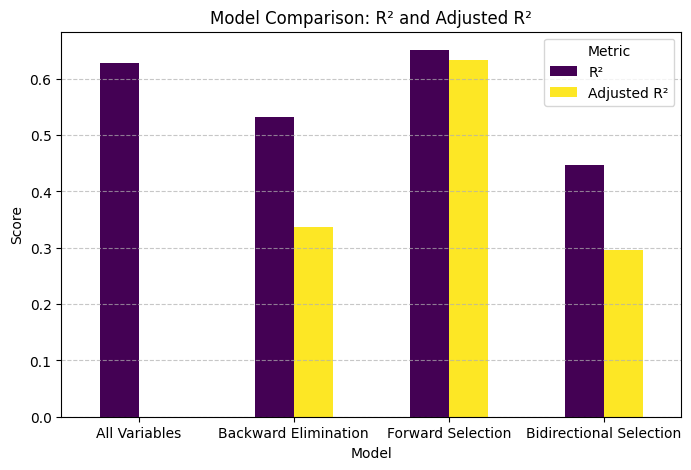

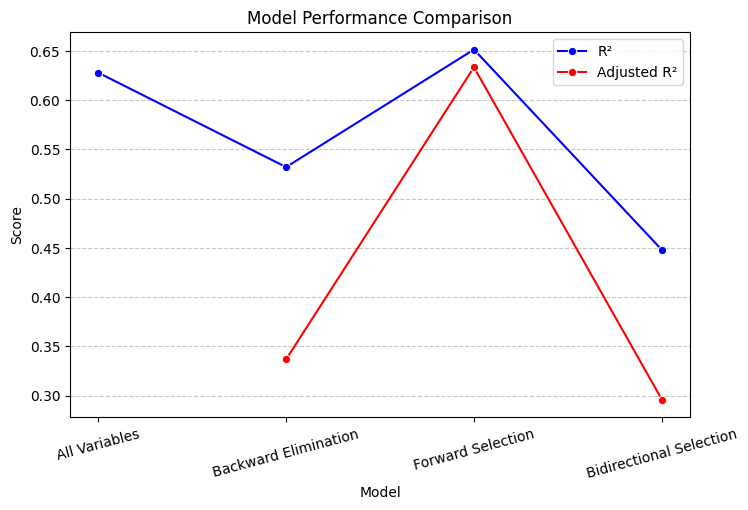

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1) if k < n else np.nan  # Avoid division by zero

# Number of samples
n = X_test.shape[0]

# Store R² and Adjusted R² values for each model
metrics = {
    "Model": ["All Variables", "Backward Elimination", "Forward Selection", "Bidirectional Selection"],
    "R²": [r2_all, r2_be, r2_fs, r2_bi],
    "Adjusted R²": [
        adjusted_r2(r2_all, n, X_test.shape[1] +1),          # All variables
        adjusted_r2(r2_be, n, X_test_be_selected.shape[1] + 1),  # Backward (add 1 for intercept)
        adjusted_r2(r2_fs, n, X_test_fs.shape[1]),             # Forward
        adjusted_r2(r2_bi, n, X_test_bi.shape[1])              # Bidirectional
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# Bar Chart
plt.figure(figsize=(8, 5))
df_metrics_plot = df_metrics.set_index("Model")
df_metrics_plot.plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Model Comparison: R² and Adjusted R²")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Line Chart
plt.figure(figsize=(8, 5))
sns.lineplot(x="Model", y="R²", data=df_metrics, marker="o", label="R²", color="blue")
sns.lineplot(x="Model", y="Adjusted R²", data=df_metrics, marker="o", label="Adjusted R²", color="red")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



## Compare Selected Attributes

In [45]:
# Compare selected features across methods
selected_features = {
    "Backward": selected_features.tolist(),
    "Forward": selected_forward.tolist(),
    "Bidirectional": selected_bi.tolist(),
}

import pandas as pd
df_features = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in selected_features.items()]))
print(df_features)


         Backward    Forward Bidirectional
0           INDUS         RM          CRIM
1             NOX      LSTAT         INDUS
2              RM       RM^2            RM
3             AGE  DIS LSTAT           DIS
4             DIS    LSTAT^2           RAD
5           LSTAT        NaN           TAX
6      CRIM INDUS        NaN             B
7       CRIM CHAS        NaN         LSTAT
8        CRIM NOX        NaN       CRIM ZN
9         CRIM RM        NaN    CRIM INDUS
10         CRIM B        NaN     CRIM CHAS
11     CRIM LSTAT        NaN      CRIM RAD
12         ZN TAX        NaN      CRIM TAX
13      INDUS DIS        NaN          ZN B
14         CHAS^2        NaN        CHAS B
15       CHAS NOX        NaN       NOX RAD
16        CHAS RM        NaN        RM TAX
17   CHAS PTRATIO        NaN         AGE B
18    NOX PTRATIO        NaN       DIS RAD
19      NOX LSTAT        NaN         RAD^2
20         RM TAX        NaN       RAD TAX
21       RM LSTAT        NaN     TAX LSTAT
22        A

## Compare Model Results (R² and Adjusted R²)

In [48]:
from sklearn.metrics import r2_score

# Function to compute adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Evaluate models
models = {
    "All Variables": (X_test, lr_all),
    "Backward Elimination": (X_test_be_selected, model_final),
    "Forward Selection": (X_test_fs, lr_forward),
    "Bidirectional Selection": (X_test_bi, lr_bi)
}

results = {}
n = X_test.shape[0]  # Number of samples

for name, (X, model) in models.items():
    y_pred = model.predict(X)
    r2 = r2_score(y_test, y_pred)
    k = X.shape[1]  # Number of features
    adj_r2 = adjusted_r2(r2, n, k)
    results[name] = {"R²": r2, "Adjusted R²": adj_r2}

df_results = pd.DataFrame(results).T
print(df_results)


                               R²  Adjusted R²
All Variables            0.627706    19.987017
Backward Elimination     0.531886     0.345923
Forward Selection        0.651187     0.633207
Bidirectional Selection  0.447904     0.296077


## Compare Model Coefficients

In [58]:
# Ensure correct feature names for each model
coefficients = {
    "All Variables": pd.Series(lr_all.coef_, index=X_train.columns),  # Ensure correct shape
    "Backward Elimination": pd.Series(model_final.coef_,index=selected_features.drop("const", errors="ignore")),
    "Forward Selection": pd.Series(lr_forward.coef_, index=selected_forward),
    "Bidirectional Selection": pd.Series(lr_bi.coef_, index=selected_bi),
}

# Convert to DataFrame
df_coefficients = pd.DataFrame(coefficients).fillna(0)  # Fill NaN for missing features

# Display
print(df_coefficients)



             All Variables  Backward Elimination  Forward Selection  \
AGE              -2.267493             -1.532270                0.0   
AGE B            -1.770343              0.054660                0.0   
AGE DIS          -0.029042              0.000000                0.0   
AGE LSTAT        -1.185240             -0.698646                0.0   
AGE PTRATIO       0.277354              0.000000                0.0   
...                    ...                   ...                ...   
ZN PTRATIO       -0.543906              0.000000                0.0   
ZN RAD           -1.757390              0.000000                0.0   
ZN RM             0.442289              0.000000                0.0   
ZN TAX            2.541046              0.407157                0.0   
ZN^2             -0.387418              0.000000                0.0   

             Bidirectional Selection  
AGE                         0.000000  
AGE B                      -2.475147  
AGE DIS                     0.